# ETL

In [35]:
import os
import time
from dotenv import load_dotenv
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
from tqdm import tqdm
from spotipy import Spotify
from pandas import DataFrame

def get_playlist_info(playlist: dict, genre: str):
    return {
        "id": playlist["id"],
        "genre": genre 
    }


def get_track_info(track,genre):
    return {
        "id": track["id"],
        "name": track["name"],
        "album_id": track["album"]["id"],
        "genre":genre
    }


def get_tracks_from_playlists(playlists: DataFrame, sp: Spotify):
    tracks_playlists = []
    errors = []

    for idx, playlist_id in enumerate(tqdm(playlists["id"])):
        try:
            # TODO: get all tracks from playlist
            playlist_tracks = sp.playlist_tracks(playlist_id=playlist_id)
            tracks_playlist = [get_track_info(item["track"],playlists["genre"][idx]) for item in playlist_tracks["items"]]
            tracks_playlists += tracks_playlist
        except TypeError as err:
            # print(f"Error en fila {idx}", err)
            errors.append(f"Error en fila {idx}, {err}")
            continue
    
    print('Errors: ', errors)

    return tracks_playlists

In [3]:
genres_seeds = [
    "acoustic", "afrobeat", "alt-rock", "alternative", "ambient", "anime", "black-metal", "bluegrass",
    "blues", "bossanova", "brazil", "breakbeat", "british", "cantopop", "chicago-house", "children", "chill",
    "classical", "club", "comedy", "country", "dance", "dancehall", "death-metal", "deep-house", "detroit-techno",
    "disco", "disney", "drum-and-bass", "dub", "dubstep", "edm", "electro", "electronic", "emo", "folk", "forro",
    "french", "funk", "garage", "german", "gospel", "goth", "grindcore", "groove", "grunge", "guitar", "happy",
    "hard-rock", "hardcore", "hardstyle", "heavy-metal", "hip-hop", "holidays", "honky-tonk", "house", "idm", "indian", 
    "indie", "indie-pop", "industrial", "iranian", "j-dance", "j-idol", "j-pop", "j-rock", "jazz", "k-pop", "kids",
    "latin", "latino", "malay", "mandopop", "metal", "metal-misc", "metalcore", "minimal-techno", "movies", "mpb",
    "new-age", "new-release", "opera", "pagode", "party", "philippines-opm", "piano", "pop", "pop-film", "post-dubstep",
    "power-pop", "progressive-house", "psych-rock", "punk", "punk-rock", "r-n-b", "rainy-day", "reggae", "reggaeton",
    "road-trip", "rock", "rock-n-roll", "rockabilly", "romance", "sad", "salsa", "samba", "sertanejo", "show-tunes",
    "singer-songwriter", "ska", "sleep", "songwriter", "soul", "soundtracks", "spanish", "study", "summer", "swedish",
    "synth-pop", "tango", "techno", "trance", "trip-hop", "turkish", "work-out", "world-music"
]

In [40]:
# Spotify API credentials
client_id = '5ab3d5c1f176456788d74a39134a4c23'
client_secret = 'ed854e82eb764dc8ac60331cc7afdf65'

# # Spotify API credentials
# load_dotenv()
# client_id = os.getenv('CLIENT_ID')
# client_secret = os.getenv('CLIENT_SECRET')

In [41]:
# Spotify API authentication
client_credentials_manager = SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)
sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

In [6]:
playlists = []

for genre in genres_seeds:
    # Search playlists by genre
    print('➡️', end='')
    playlists_data = sp.search(q=genre, type='playlist', limit=10, offset=0)
    playlists += [
        get_playlist_info(playlist, genre)
        for playlist in playlists_data['playlists']['items']
    ]

df_playlists = pd.DataFrame(playlists)
print(f'\nShape playlists', df_playlists.shape)

# Validation of playlists with null values
print(f'Null in id col of playlists', df_playlists["id"].isna().value_counts())

# Delete rows with null values
df_playlists.dropna(inplace=True)
print(f'Null in id col of playlists', df_playlists["id"].isna().value_counts())

df_playlists.head()

➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️
Shape playlists (1259, 2)
Null in id col of playlists id
False    1259
Name: count, dtype: int64
Null in id col of playlists id
False    1259
Name: count, dtype: int64


,id,genre
0,37i9dQZF1DWUH2AzNQzWua,acoustic
1,37i9dQZF1DWXmlLSKkfdAk,acoustic
2,37i9dQZF1EIdu0PHOCYQ71,acoustic
3,37i9dQZF1DWWxrt1tiKYiX,acoustic
4,4Xv7w5RBLUz71sSzIs4C6b,acoustic


In [7]:
# Save df_tracks to csv
df_playlists.to_csv('./datasets/playlists.csv', index=False)

In [9]:
# Get tracks from playlists
tracks_playlists = get_tracks_from_playlists(playlists=df_playlists, sp=sp)
df_tracks = pd.DataFrame(tracks_playlists)
print('Shape tracks:', df_tracks.shape)

# Validation of tracks with null values
print('Null in id col of tracks:', df_tracks["id"].isna().value_counts())

# Delete rows with null values
df_tracks.dropna(inplace=True)
print('Null in id col of tracks:', df_tracks["id"].isna().value_counts())

# Delete duplicates by id
# df_tracks.drop_duplicates(subset=["id"], inplace=True)
# print('Shape tracks (without duplicates):', df_tracks.shape)

100%|██████████| 1259/1259 [10:51<00:00,  1.93it/s]

Errors:  ["Error en fila 58, 'NoneType' object is not subscriptable", "Error en fila 103, 'NoneType' object is not subscriptable", "Error en fila 249, 'NoneType' object is not subscriptable", "Error en fila 586, 'NoneType' object is not subscriptable", "Error en fila 592, 'NoneType' object is not subscriptable", "Error en fila 655, 'NoneType' object is not subscriptable", "Error en fila 672, 'NoneType' object is not subscriptable", "Error en fila 825, 'NoneType' object is not subscriptable", "Error en fila 1026, 'NoneType' object is not subscriptable", "Error en fila 1182, 'NoneType' object is not subscriptable"]
Shape tracks: (93936, 4)
Null in id col of tracks: id
False    93923
True        13
Name: count, dtype: int64
Null in id col of tracks: id
False    93923
Name: count, dtype: int64


In [10]:
df_tracks.head()

,id,name,album_id,genre
0,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic
1,6Qyc6fS4DsZjB2mRW9DsQs,Iris,4UMjBXcRqIgMZ1XumU2x5T,acoustic
2,3d9DChrdc6BOeFsbrZ3Is0,Under the Bridge,30Perjew8HyGkdSmqguYyg,acoustic
3,77loZpT5Y5PRP1S451P9Yz,The Reason,2zE1YKY7Okj10Tjl09jjth,acoustic
4,5hnyJvgoWiQUYZttV4wXy6,Chasing Cars,3k7bXPw2u0C0SBKPMsgMS3,acoustic


In [25]:
# Viw duplicates in name column
df_tracks[df_tracks.duplicated(subset=["name"], keep=False)].sort_values(by=["name"])

,id,name,album_id,genre
43442,4fgJe7zBjVXvs8HxtE21Y9,,0OV6Olty1sYOl8414511Ae,indian
76134,12SS15iJYs3mhCy2qZIieR,,4RYc6wAeEXvzrQIgdj3575,rockabilly
43437,3fpVYSLnxkadjYwQPTyo4H,,61galBMmvNvVtuFjeRndZ4,indian
76133,49mBPVk821sKWt5FcOMcSS,,4RYc6wAeEXvzrQIgdj3575,rockabilly
43461,0zHZSO80CTxNtvtRhveHRJ,,5ASFrellizlx98SmsItOEm,indian
...,...,...,...,...
48246,43U0PLdY4vITgAB7FLtWkJ,黒毛和牛上塩タン焼680円 - maeshima soshi Remix,3xGFCjAoocza2CAAeW30ex,j-pop
54148,0ZJecVwpRY2TKi3j2kkwXR,龍捲風,6r6z1ChrXORrklFyEdRfNs,mandopop
53890,4eLCzybaneILH1zBkwwQyZ,龍捲風,0yS6jOCvKaY6KfJ1Cpc7FZ,mandopop
50736,6YOXdy9jShw66iOnBzQMKv,봄인가 봐 Spring Love,1DzMyEZcFmD72jdkp4O73D,k-pop


In [26]:
# If one track has more than one genre, we will merge them
# Example: id 4fgJe7zBjVXvs8HxtE21Y9 has 2 genres: 'anime' and 'j-pop'
# We will merge them into one: 'anime,j-pop'
df_tracks = df_tracks.groupby(["id", "name", "album_id"])["genre"].apply(lambda x: ','.join(x)).reset_index()
print('Shape tracks:', df_tracks.shape)
df_tracks.head()

Shape tracks: (67314, 4)


,id,name,album_id,genre
0,000ETNHKRNLHNPjsCojYkc,Wargod,0i3dDHDl3RCfP1tEIqOx9h,"black-metal,death-metal,grindcore"
1,000N4CJL8IjQ0f2I4grgBO,Girl Next Door,1FLS0YAOPY3Mcb0o5n5fl4,"afrobeat,afrobeat"
2,000VZqvXwT0YNqKk7iG2GS,Mercy,75kQjmcR1YnIrBwVW1s4G1,metalcore
3,000xQBsBOXGbHzbOwWsTua,Harmony in Blue I,1U5x6wQtMJtbwM3NZRSvKT,ambient
4,001zs060RfeATbj7BFVwzS,Death Engine,3hKLQO8S8Kx5h1F06jed8r,industrial


In [27]:
unique_ids = df_tracks["id"].unique()
print('Unique ids:', len(unique_ids))

Unique ids: 67314


In [29]:
# Save df_tracks to csv
df_tracks.to_csv('./datasets/tracks.csv', index=False)

In [42]:
# Get audio features from tracks
audio_features = []

for n in tqdm(range(len(df_tracks) // 100 + 1)):
    df_track_pack = df_tracks.iloc[n*100:(n+1)*100]
    if (n % 10):
        print("Time to sleep 🌚")
        time.sleep(10)
    audio_features_pack = sp.audio_features(tracks=list(df_track_pack['id']))
    audio_features += audio_features_pack

df_audio_features = pd.DataFrame(audio_features)
print('Shape audio features:', df_audio_features.shape)

  0%|          | 0/674 [00:04<?, ?it/s]


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=000ETNHKRNLHNPjsCojYkc,000N4CJL8IjQ0f2I4grgBO,000VZqvXwT0YNqKk7iG2GS,000xQBsBOXGbHzbOwWsTua,001zs060RfeATbj7BFVwzS,0024tEymsoc9FyKUauQngQ,002LzF75tglGIYV440tPnl,002YdWxaenIUL4PHiv5EB5,003CpLpVCGuyfZe4dLB1No,003FTlCpBTM4eSqYSWPv4H,003ShLCyC9ACAsdUWOcnk0,003vvx7Niy0yvhvHt4a68B,004QXOYVCCzS9XndVR5ert,004skCQeDn1iLntSom0rRr,005PrMKAhDjR0cUSMYmdYH,005lwxGU1tms6HGELIcUv9,006JD7YY4auKXCliue9Tv4,0078peqORcMMXbcYEfeLkk,007kRcQoBb4BN9GywpeJAa,008KWijTsFnZRK3E7oGNxl,008oZBu5AqNki6phkwCTH5,008q1ztvnmNxD7W4VjfHrm,009ImBOrIUlWgla8U05RAC,009yAC1axMJkhvYFgkB3nA,00B3cITDbSBY9GeKZvxw9M,00Blm7zeNqgYLPtW6zg8cj,00BuKLSAFkaEkaVAgIMbeA,00CAvPIbaOTN0dJAEC0fsT,00CXUMREit80f2McJsjcIz,00DIQnX8LllF7OWKGuawqI,00EFWaqXnHZ5smJNsHtnGV,00ETaeHUQ6lops3oWU1Wrt,00F7KL6HIWNJNfQwszn7uI,00FKD8czz1yiSufNQJYFf8,00FL5d6IDB4Q6VROycdzOP,00FROhC5g4iJdax5US8jRr,00FU5uypELwgQuM9IbFC6G,00GNpQ23KpNNj50OFGpuoI,00HhY3b3DtbfiUqX5MQ8tG,00Hlym039AB1cZPzgJVi5s,00IetQg58E6BF70QPOYG5N,00JZJvHKJAhA4DKyEUnwtA,00Ja20eonXSXD5vB3Qgqmo,00KCwnrvIXX8GRU3ZMOIBW,00KPugdklpcrFNnjWlXjj2,00KWHzp5bqTDynznUhln7f,00KXjHg8W5NT5xEbwp0d7G,00L9p3dKK3ufNyua3pzVeC,00LfFm08VWeZwB0Zlm24AT,00Lj1J1h090OPgkDEyynAd,00MDdSPO6iWPZwwuF6RH89,00Mb3DuaIH1kjrwOku9CGU,00N6JtjDmWaGgfa6LmBGmc,00NbtCjGk8CqdB8ukjxCT4,00Nsyeo2kcU4602zMsLWXW,00O9UbKHhEJmlsbroCOGX2,00PLtXXER1XcTRZvs3LioS,00PlVxHEJucd9b84TYTbSL,00PnnS7qqf3cZRv7nPX0eQ,00QyLmjxaSEE8qIZQjBXBj,00Ro1lnV3V6i87aY4t8Q43,00SR68yKLJwnJqHICX8SZx,00SmB7n85SKROGjybsyq5i,00Swb9gjfanNTyVABpVvqy,00TIas674Ig9bZbFNuUPQM,00TNno8mzugrcej0FqJvrW,00TOiZMOdu5tioejShnB0L,00TU7szqwBrxWTd9SO7ihK,00TZOHkxcWgWOZcXMC7TlR,00U0pedRUMEzREpyRqbVT6,00U1MDChdOTxWwtKoOoBXE,00VV8fObAQ5g6TBxWBytOr,00WU31DXRd2Q7GMemE0Thi,00WvmRXTkPBZNhhRK3xfdy,00X2gNT1fG1m6XnDyIDPwg,00XUAzBDohfNPHityq5E0k,00XeCakqj4KHOOYnbv59Tx,00XrSeoUJusUuWvqd08lyF,00Y7HlMEGSgEpfIeTD82t7,00Y9r5SfbDdEjJhNg7laQr,00YOa6SnANXEQWK9JWJlpm,00YeAWckFwAyrvzvHlYMOk,00YtcBLPI05RpGNbqKqiaC,00ZtBTomz4L3k1Hq54TLEi,00ZvSFoxykSvyrrqVSN51y,00aWZjvNgFOUcs9FaAzcVy,00b4OX3MFLHry2fLqPg5ae,00b9utayyiUwzCkXLWSf8f,00bAw28lKcHj3B94a1wJle,00bRjo5PU7hpqkMWdaMOOt,00bnP8RyknzZMkNlEAO2ih,00cP5rqzL6ZrwMaqTEeGIN,00dUCL3WfkgU0oqCSVdneu,00eJYYLj3L2Mr2Nl1a9J02,00f9VGHfQhAHMCQ2bSjg3D,00fMrdknKRNqnnBl3EkftU,00fRUfon3pr861IKiG03kA,00gscXjMt09aOxodmaDeR4,00i0O74dXdaKKdCrqHnfXm,00i2HU7TEzzftShjRrDSEF:
 Max Retries, reason: too many 429 error responses

In [13]:
idx_af_bads = []
for idx, af in enumerate(audio_features):
    if af is None:
        idx_af_bads.append(idx)

print('Number of None values in audio features:', len(idx_af_bads))

Number of None values in audio features: 35


In [14]:
# Delete None values in audio_features before convert to DataFrame
audio_features = [af for af in audio_features if af is not None]
df_audio_features = pd.DataFrame(audio_features)
print('Shape audio features (without None values):', df_audio_features.shape)
df_audio_features.head()

Shape audio features (without None values): (93888, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.2850,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
1,0.315,0.715,11,-8.072,0,0.0362,0.00125,0.000008,0.0942,0.4970,155.925,audio_features,6Qyc6fS4DsZjB2mRW9DsQs,spotify:track:6Qyc6fS4DsZjB2mRW9DsQs,https://api.spotify.com/v1/tracks/6Qyc6fS4DsZj...,https://api.spotify.com/v1/audio-analysis/6Qyc...,289533,3
2,0.559,0.345,4,-13.496,1,0.0459,0.05760,0.000105,0.1410,0.4580,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4
3,0.472,0.671,4,-4.649,1,0.0290,0.01290,0.000000,0.1590,0.0681,82.952,audio_features,77loZpT5Y5PRP1S451P9Yz,spotify:track:77loZpT5Y5PRP1S451P9Yz,https://api.spotify.com/v1/tracks/77loZpT5Y5PR...,https://api.spotify.com/v1/audio-analysis/77lo...,232800,4
4,0.560,0.595,9,-4.530,1,0.0274,0.19900,0.000065,0.1320,0.1440,104.011,audio_features,5hnyJvgoWiQUYZttV4wXy6,spotify:track:5hnyJvgoWiQUYZttV4wXy6,https://api.spotify.com/v1/tracks/5hnyJvgoWiQU...,https://api.spotify.com/v1/audio-analysis/5hny...,267960,4


In [15]:
# Save df_audio_features to csv
df_audio_features.to_csv('./datasets/audio_features.csv', index=False)

In [21]:
print('audio features', df_audio_features.shape)
print('tracks', df_tracks.shape)

audio features (93888, 18)
tracks (93923, 4)


In [24]:
# Merge dataframes df_tracks and df_audio_features
df_tracks_audio_features = pd.merge(
    df_tracks,
    df_audio_features,
    on="id",
    how="inner"
)
print(f'Shape audio features (after merge with tracks):', df_tracks_audio_features.shape)
df_tracks_audio_features.head(20)

Shape audio features (after merge with tracks): (219950, 21)


,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
1,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
2,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
3,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
4,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
5,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
6,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
7,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
8,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
9,3AJwUDP919kvQ9QcozQPxg,Yellow,6ZG5lRT77aJ3btmArcykra,acoustic,0.429,0.661,11,-7.227,1,0.0281,...,0.000121,0.234,0.285,173.372,audio_features,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4


In [ ]:
# Save df_tracks_audio_features to csv
df_tracks_audio_features.to_csv('./datasets/tracks_audio_features.csv', index=False)

In [20]:
df_tracks_audio_features.columns

Index(['id', 'name', 'album_id', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

# EDA

In [23]:
#
df_tracks_audio_features.columns

Index(['id', 'name', 'album_id', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [24]:
#Realizamos una exploracion de los datos de df_tracks_audio_features
df_tracks_audio_features.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.655679,0.718861,5.247560,-6.089882,0.593611,0.114945,0.141565,0.023600,0.186894,0.556620,122.282106,217417.593611,3.961846
std,0.151123,0.166933,3.629112,2.912027,0.491377,0.106387,0.189217,0.113163,0.146366,0.220021,28.053028,55637.854100,0.275332
min,0.000000,0.001590,0.000000,-27.275000,0.000000,0.000000,0.000018,0.000000,0.022200,0.000000,0.000000,68963.000000,0.000000
25%,0.558000,0.623500,2.000000,-7.506000,0.000000,0.041350,0.012400,0.000000,0.090900,0.397000,99.975500,183193.500000,4.000000
50%,0.667000,0.736000,5.000000,-5.542000,1.000000,0.066600,0.061000,0.000001,0.128000,0.564000,120.040000,210227.000000,4.000000
75%,0.771500,0.848000,8.000000,-4.151000,1.000000,0.154500,0.188500,0.000164,0.252500,0.737000,140.022000,240233.000000,4.000000
max,0.967000,0.996000,11.000000,-0.016000,1.000000,0.741000,0.991000,0.951000,0.946000,0.973000,202.049000,547107.000000,5.000000


In [33]:
df_tracks_audio_features["genre"].value_counts()

pop        312
rock       296
hip-hop    294
k-pop      225
Name: genre, dtype: int64

<Axes: >

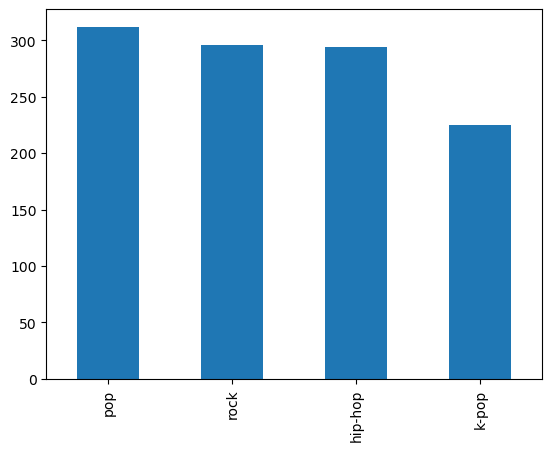

In [34]:
#Realizamos un grafico de barra para ver la distribucion de generos
df_tracks_audio_features["genre"].value_counts().plot(kind="bar")

<Axes: xlabel='genre', ylabel='acousticness'>

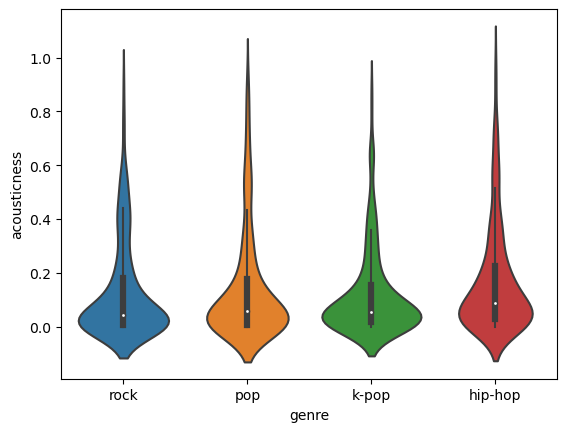

In [51]:
#Realizamos un grafico de violin para la distribucion de las features para cada genero
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x="genre", y="acousticness", data=df_tracks_audio_features)







In [45]:
sns.violinplot(x="genre", y="danceability", data=df_tracks_audio_features, ax=axes[0,1])


<Axes: xlabel='genre', ylabel='danceability'>

In [46]:
sns.violinplot(x="genre", y="duration_ms", data=df_tracks_audio_features, ax=axes[0,2])


<Axes: xlabel='genre', ylabel='duration_ms'>

In [47]:
sns.violinplot(x="genre", y="energy", data=df_tracks_audio_features, ax=axes[1,0])


<Axes: xlabel='genre', ylabel='energy'>

In [48]:
sns.violinplot(x="genre", y="instrumentalness", data=df_tracks_audio_features, ax=axes[1,1])


<Axes: xlabel='genre', ylabel='instrumentalness'>

In [ ]:
sns.violinplot(x="genre", y="key", data=df_tracks_audio_features, ax=axes[1,2])
sns.violinplot(x="genre", y="liveness", data=df_tracks_audio_features, ax=axes[2,0])
sns.violinplot(x="genre", y="loudness", data=df_tracks_audio_features, ax=axes[2,1])
sns.violinplot(x="genre", y="mode", data=df_tracks_audio_features, ax=axes[2,2])
sns.violinplot(x="genre", y="speechiness", data=df_tracks_audio_features, ax=axes[3,0])
sns.violinplot(x="genre", y="tempo", data=df_tracks_audio_features, ax=axes[3,1])
sns.violinplot(x="genre", y="valence", data=df_tracks_audio_features, ax=axes[3,2])